In [1]:
# ___ adjacency matrix ___
# this code ensures we are constructing the adjacency matrix correctly

import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import entropy
from collections import Counter

# Define 3 traces
trace1 = ["a1", "a2", "a3", "a1", "a3", "a2"]
trace2 = ["a1", "a4", "a3", "a1", "a2", "a1", "a2"]

def get_pairs(trace):
    return [(trace[i], trace[i+1]) for i in range(len(trace) - 1)]

# construct a adjacency matrix between 2 traces
def construct_adjacency_matrix(trace1, trace2):
    # get the uninon of the 2 traces
    union = list(set(trace1).union(set(trace2)))
    print("Union of trace1 and trace2: ", union)
    # construct a matrix of zeros
    t1_t2_matrix = np.zeros((len(union), len(union)))
    t2_t1_matrix = np.zeros((len(union), len(union)))

    # initialize every element in the matrix to 1 besides the diagonal
    for i in range(len(union)):
        for j in range(len(union)):
            if i != j:
                t1_t2_matrix[i][j] = 1
                t2_t1_matrix[i][j] = 1
    # print the matrix with nice formatting to see what it looks like
    print("Adjacency matrix t1_t2_matrix: \n", t1_t2_matrix)
    print("Adjacency matrix t2_t1_matrix: \n", t2_t1_matrix)

    # get the frequency of each pair of elements in each trace. remember order matters we only want to count the pair once and going forward in the trace.

    pairs1 = get_pairs(trace1)
    pairs2 = get_pairs(trace2)

    # Get the pair frequencies for each trace
    pair_freq1 = Counter([tuple(pair) for pair in pairs1])
    pair_freq2 = Counter([tuple(pair) for pair in pairs2])

    print(f'Pair frequencies for trace1: {pair_freq1}') 
    print(f'Pair frequencies for trace2: {pair_freq2}')

    # update the adjacency matrix with the pair frequencies. add the value of pair_freq[(a,b)] to the matrix at the index of a and b. do not overwrite the values that are already there.
    for pair, freq in pair_freq1.items():
        t1_t2_matrix[union.index(pair[0])][union.index(pair[1])] += freq
    for pair, freq in pair_freq2.items():
        t2_t1_matrix[union.index(pair[0])][union.index(pair[1])] += freq

    
    # print the matrix with nice formatting to see what it looks like
    print("Adjacency matrix t1_t2_matrix: \n", t1_t2_matrix)
    print("Adjacency matrix t2_t1_matrix: \n", t2_t1_matrix)

    # normalize the matrix by dividing each row by the sum of the row
    t1_t2_matrix = t1_t2_matrix / t1_t2_matrix.sum(axis=1, keepdims=True)
    t2_t1_matrix = t2_t1_matrix / t2_t1_matrix.sum(axis=1, keepdims=True)

    # print the matrix with nice formatting to see what it looks like
    print("Adjacency matrix t1_t2_matrix: \n", t1_t2_matrix)
    print("Adjacency matrix t2_t1_matrix: \n", t2_t1_matrix)

    return t1_t2_matrix, t2_t1_matrix

t1_t2_matrix, t2_t1_matrix = construct_adjacency_matrix(trace1, trace2)

Union of trace1 and trace2:  ['a4', 'a1', 'a2', 'a3']
Adjacency matrix t1_t2_matrix: 
 [[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
Adjacency matrix t2_t1_matrix: 
 [[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
Pair frequencies for trace1: Counter({('a1', 'a2'): 1, ('a2', 'a3'): 1, ('a3', 'a1'): 1, ('a1', 'a3'): 1, ('a3', 'a2'): 1})
Pair frequencies for trace2: Counter({('a1', 'a2'): 2, ('a1', 'a4'): 1, ('a4', 'a3'): 1, ('a3', 'a1'): 1, ('a2', 'a1'): 1})
Adjacency matrix t1_t2_matrix: 
 [[0. 1. 1. 1.]
 [1. 0. 2. 2.]
 [1. 1. 0. 2.]
 [1. 2. 2. 0.]]
Adjacency matrix t2_t1_matrix: 
 [[0. 1. 1. 2.]
 [2. 0. 3. 1.]
 [1. 2. 0. 1.]
 [1. 2. 1. 0.]]
Adjacency matrix t1_t2_matrix: 
 [[0.         0.33333333 0.33333333 0.33333333]
 [0.2        0.         0.4        0.4       ]
 [0.25       0.25       0.         0.5       ]
 [0.2        0.4        0.4        0.        ]]
Adjacency matrix t2_t1_matrix: 
 [[0.         0.25       0.25       0.5       ]
 [0.33333333 0.     

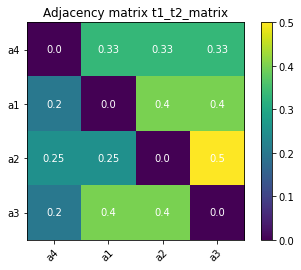

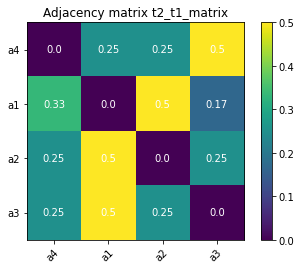

In [2]:
import matplotlib.pyplot as plt

# create a heatmap of the adjacency matrix
fig, ax = plt.subplots()
im = ax.imshow(t1_t2_matrix)

union = list(set(trace1).union(set(trace2)))

# set the axis labels
ax.set_xticks(range(len(union)))
ax.set_yticks(range(len(union)))
ax.set_xticklabels(union)
ax.set_yticklabels(union)

# rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# show the values of the matrix in each cell
for i in range(len(union)):
    for j in range(len(union)):
        text = ax.text(j, i, round(t1_t2_matrix[i, j], 2),
                       ha="center", va="center", color="w")

# set the title
ax.set_title("Adjacency matrix t1_t2_matrix")

# show the plot
plt.show()

# create a heatmap of the adjacency matrix
fig, ax = plt.subplots()
im = ax.imshow(t2_t1_matrix)

# set the axis labels
ax.set_xticks(range(len(union)))
ax.set_yticks(range(len(union)))
ax.set_xticklabels(union)
ax.set_yticklabels(union)

# rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor") 

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# show the values of the matrix in each cell
for i in range(len(union)):
    for j in range(len(union)):
        text = ax.text(j, i, round(t2_t1_matrix[i, j], 2),
                       ha="center", va="center", color="w")

# set the title
ax.set_title("Adjacency matrix t2_t1_matrix")

# show the plot
plt.show()

In [3]:
# ___ computing kld and jsd for all trace matrixes ___
from scipy.special import kl_div
import numpy as np
from scipy.spatial.distance import jensenshannon
from scipy.stats import entropy
from collections import Counter

# Define 3 traces
trace1 = ["a1", "a2", "a3", "a1", "a3", "a2"]
trace2 = ["a1", "a4", "a3", "a1", "a2", "a1", "a2"]
trace3 = ["a1", "a4", "a2", "a3", "a2","a1", "a2", "a3"]

def get_pairs(trace):
    return [(trace[i], trace[i+1]) for i in range(len(trace) - 1)]

# construct a adjacency matrix between 2 traces
def construct_adjacency_matrix(trace1, trace2):
    # get the uninon of the 2 traces
    union = list(set(trace1).union(set(trace2)))

    # construct a matrix of zeros
    t1_t2_matrix = np.zeros((len(union), len(union)))
    t2_t1_matrix = np.zeros((len(union), len(union)))

    # initialize every element in the matrix to 1 besides the diagonal
    for i in range(len(union)):
        for j in range(len(union)):
            if i != j:
                t1_t2_matrix[i][j] = 1
                t2_t1_matrix[i][j] = 1

    # get the frequency of each pair of elements in each trace. remember order matters we only want to count the pair once and going forward in the trace.
    pairs1 = get_pairs(trace1)
    pairs2 = get_pairs(trace2)

    # Get the pair frequencies for each trace
    pair_freq1 = Counter([tuple(pair) for pair in pairs1])
    pair_freq2 = Counter([tuple(pair) for pair in pairs2])

    # update the adjacency matrix with the pair frequencies. add the value of pair_freq[(a,b)] to the matrix at the index of a and b. do not overwrite the values that are already there.
    for pair, freq in pair_freq1.items():
        t1_t2_matrix[union.index(pair[0])][union.index(pair[1])] += freq
    for pair, freq in pair_freq2.items():
        t2_t1_matrix[union.index(pair[0])][union.index(pair[1])] += freq

    # normalize the matrix by dividing each row by the sum of the row
    t1_t2_matrix = t1_t2_matrix / t1_t2_matrix.sum(axis=1, keepdims=True)
    t2_t1_matrix = t2_t1_matrix / t2_t1_matrix.sum(axis=1, keepdims=True)

    return t1_t2_matrix, t2_t1_matrix

# compute the kl divergence between the 2 traces
def compute_kl_divergence(trace1, trace2):
    # compute the kl divergence
    t1_t2_kld = np.sum(kl_div(trace1.flatten(), trace2.flatten()))
    t2_t1_kld = np.sum(kl_div(trace2.flatten(), trace1.flatten()))

    # print the results
    # print(f'KL divergence from trace1 to trace2: {t1_t2_kld}')
    # print(f'KL divergence from trace2 to trace1: {t2_t1_kld}')

    return t1_t2_kld, t2_t1_kld

# compute the js divergence between the 2 traces
def compute_js_divergence(trace1, trace2):

    # compute the js divergence
    js_divergence = jensenshannon(trace1.flatten(), trace2.flatten())

    # print the results
    # print(f'JS divergence between trace1 and trace2: {js_divergence}')

    return js_divergence

# compute kld and jsd for all 3 traces and store results in a 2 new matrices
def run_all_traces(list_of_traces):
    num_traces = len(list_of_traces)
    print(f'Number of traces: {num_traces}')

    # create empty matrices to store the results
    kld_matrix = np.zeros((num_traces, num_traces))
    jsd_matrix = np.zeros((num_traces, num_traces))

    # iterate over all pairs of traces and compute the kld and jsd
    for i in range(num_traces):
        for j in range(i+1, num_traces):
            # print out the pair of traces we are computing the kld and jsd for
            print(f'Computing kld and jsd for trace {i+1} and trace {j+1}')
            matrix1, matrix2 = construct_adjacency_matrix(list_of_traces[i], list_of_traces[j])
            # print the matrices
            print(f'Adjacency matrix for trace {i+1}: \n', matrix1)
            print(f'Adjacency matrix for trace {j+1}: \n', matrix2)
            kld_12, kld_21 = compute_kl_divergence(matrix1, matrix2)
            jsd = compute_js_divergence(matrix1, matrix2)
            # print the results
            print(f'KL divergence from trace {i+1} to trace {j+1}: {kld_12}')
            print(f'KL divergence from trace {j+1} to trace {i+1}: {kld_21}')
            print(f'JS divergence between trace {i+1} and trace {j+1}: {jsd}')
            kld_matrix[i][j] = kld_12
            kld_matrix[j][i] = kld_21
            jsd_matrix[i][j] = jsd
            jsd_matrix[j][i] = jsd
            # print both matrices
            print(f'KL Divergence Matrix so far: \n', kld_matrix)
            print(f'JS Divergence Matrix so far: \n', jsd_matrix)

    return kld_matrix, jsd_matrix

# create a list of the 3 traces
list_of_traces = [trace1, trace2, trace3]

kld_matrix, jsd_matrix = run_all_traces(list_of_traces)

# print the results
print("final results: _____________________________________________________________")
print("KL Divergence Matrix: \n", kld_matrix)
print("JS Divergence Matrix: \n", jsd_matrix)

Number of traces: 3
Computing kld and jsd for trace 1 and trace 2
Adjacency matrix for trace 1: 
 [[0.         0.33333333 0.33333333 0.33333333]
 [0.2        0.         0.4        0.4       ]
 [0.25       0.25       0.         0.5       ]
 [0.2        0.4        0.4        0.        ]]
Adjacency matrix for trace 2: 
 [[0.         0.25       0.25       0.5       ]
 [0.33333333 0.         0.5        0.16666667]
 [0.25       0.5        0.         0.25      ]
 [0.25       0.5        0.25       0.        ]]
KL divergence from trace 1 to trace 2: 0.4428000779775652
KL divergence from trace 2 to trace 1: 0.4179705964958532
JS divergence between trace 1 and trace 2: 0.1625576483091309
KL Divergence Matrix so far: 
 [[0.         0.44280008 0.        ]
 [0.4179706  0.         0.        ]
 [0.         0.         0.        ]]
JS Divergence Matrix so far: 
 [[0.         0.16255765 0.        ]
 [0.16255765 0.         0.        ]
 [0.         0.         0.        ]]
Computing kld and jsd for trace 1 

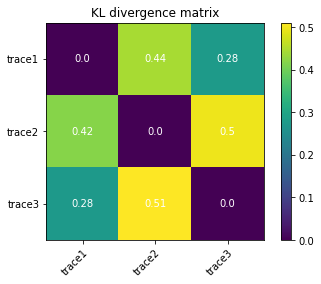

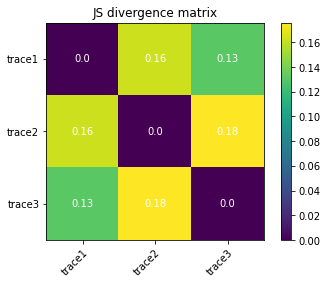

In [4]:
# ___ plotting the results ___
import seaborn as sns
import matplotlib.pyplot as plt


# create a heatmap of the kld matrix
fig, ax = plt.subplots()
im = ax.imshow(kld_matrix)

# set the axis labels
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(["trace1", "trace2", "trace3"])
ax.set_yticklabels(["trace1", "trace2", "trace3"])

# rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor") 

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# show the values of the matrix in each cell
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, round(kld_matrix[i, j], 2),
                        ha="center", va="center", color="w")

# set the title
ax.set_title("KL divergence matrix")

# show the plot
plt.show()

# create a heatmap of the jsd matrix
fig, ax = plt.subplots()
im = ax.imshow(jsd_matrix)

# set the axis labels
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(["trace1", "trace2", "trace3"])
ax.set_yticklabels(["trace1", "trace2", "trace3"])

# rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# show the values of the matrix in each cell
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, round(jsd_matrix[i, j], 2),
                        ha="center", va="center", color="w")

# set the title
ax.set_title("JS divergence matrix")

# show the plot
plt.show()


In [5]:
# Run Minimum Spanning Tree (Prims or Kruskal) algorithm on the matrix that you computed. 
import networkx as nx

# Create a graph from the adjacency matrix for kld_matrix and jsd_matrix
G_kld = nx.from_numpy_matrix(kld_matrix)
G_jsd = nx.from_numpy_matrix(jsd_matrix)

# Run Prim's algorithm to find the minimum spanning tree for both kld and jsd
prim_mst_on_kld = nx.minimum_spanning_tree(G_kld, algorithm='prim')
prim_mst_on_jsd = nx.minimum_spanning_tree(G_jsd, algorithm='prim')

# Run Kruskal's algorithm to find the minimum spanning tree for both kld and jsd
kru_mst_on_kld = nx.minimum_spanning_tree(G_kld, algorithm='kruskal')
kru_mst_on_jsd = nx.minimum_spanning_tree(G_jsd, algorithm='kruskal')

# Print the edges for all of the minimum spanning trees 
print("Prim's algorithm on kld matrix: ", prim_mst_on_kld.edges())
print("Prim's algorithm on jsd matrix: ", prim_mst_on_jsd.edges())
print("Kruskal's algorithm on kld matrix: ", kru_mst_on_kld.edges())
print("Kruskal's algorithm on jsd matrix: ", kru_mst_on_jsd.edges())

# not sure which one of these we want to use or if they are correct

Prim's algorithm on kld matrix:  [(0, 2), (0, 1)]
Prim's algorithm on jsd matrix:  [(0, 2), (0, 1)]
Kruskal's algorithm on kld matrix:  [(0, 2), (0, 1)]
Kruskal's algorithm on jsd matrix:  [(0, 2), (0, 1)]


In [10]:
mst = prim_mst_on_kld

In [16]:
# ___ Girvan Newman algorithm ___
import networkx as nx
from networkx.algorithms.community import girvan_newman, modularity

# Convert the minimum spanning tree to an undirected graph
G = mst.to_undirected()

# Run the Girvan-Newman algorithm to detect communities
communities = girvan_newman(G)

# Compute the modularity of the detected communities
modularity_score = modularity(G, communities)

# Print the detected communities and modularity score
print("Detected communities:", tuple(sorted(c) for c in next(communities)))
print("Modularity score:", modularity_score)

NotAPartition: Graph with 3 nodes and 2 edges is not a valid partition of the graph [({0, 1}, {2}), ({0}, {1}, {2})]

In [17]:
# ___ Louvain algorithm ___
import networkx as nx
import community

# Convert the minimum spanning tree to an undirected graph
G = mst.to_undirected()

# Run the Louvain algorithm to detect communities
partition = community.best_partition(G)

# Print the detected communities
communities = {}
for node, comm in partition.items():
    if comm not in communities:
        communities[comm] = []
    communities[comm].append(node)
print("Detected communities:", tuple(sorted(c) for c in communities.values()))


Detected communities: ([0, 1, 2],)
